#  Kompresja obrazu
Weronika Ormaniec

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [128]:
def channel_wise_svd(I):
    SVD = []
    for c in range(3):
        SVD.append(np.linalg.svd(I[:,:,c]))
    return SVD

In [134]:
def first_k(v, k):
    for i in range(k, len(v)):
        v[i]=0
    return v

In [166]:
def low_rank_approx(img, k, n):
    SVD = channel_wise_svd(img)
    I = [] 
    for c in range(3):
        svd = SVD[c]
        i = svd[0]@(np.identity(n)*first_k(svd[1], k))@svd[2]
        I.append(i)
    return np.stack((I[0], I[1], I[2]), axis=2)

In [182]:
def show_differnce(img_k, img, k):
    img_k = np.minimum(np.maximum(img_k, np.zeros((512, 512, 3))), np.ones((512, 512, 3)))
    diff = np.linalg.norm(img_k-img)
    print(f'Difference for {k} singular values given by Frobenius norm: {diff}')
    mpimg.imsave(f'img_{k}.png', img_k)
    plt.imshow(img_k)

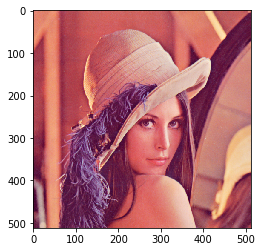

In [167]:
img = mpimg.imread('lena.png')
img.shape
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Difference for 1 singular values given by Frobenius norm: 137.99012054392176


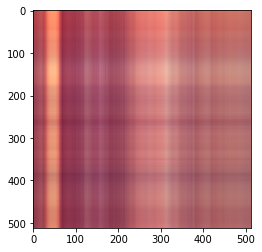

In [183]:
img_1 = low_rank_approx(img, 1, 512)
show_differnce(img_1, img, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Difference for 20 singular values given by Frobenius norm: 47.40855745254557


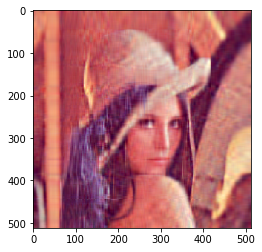

In [184]:
img_20 = low_rank_approx(img, 20, 512)
show_differnce(img_20, img, 20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Difference for 50 singular values given by Frobenius norm: 28.22632471856812


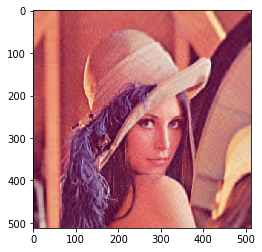

In [185]:
img_50 = low_rank_approx(img, 50, 512)
show_differnce(img_50, img, 50)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Difference for 100 singular values given by Frobenius norm: 16.407271803085813


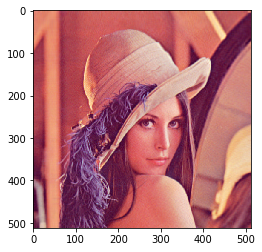

In [186]:
img_100 = low_rank_approx(img, 100, 512)
show_differnce(img_100, img, 100)